In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pima=pd.read_csv("pima-indians-diabetes.csv")
pima.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
feature_cols = ['Preg','Plas', 'Pres', 'skin', 'test', 'mass', 'pedi','age']
x = pima[feature_cols] # we can separate class by using drop function
y=pima['class']

In [17]:
x.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [42]:
# spliting data into train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=True)

In [43]:
# As we see in data "test" collumns contains zero.

In [44]:
# Hence replacing Zero's with serial mean values

#from sklearn.preprocessing import Imputer
#my_imputer=Imputer()

from sklearn.impute import SimpleImputer
rep_o=SimpleImputer(missing_values=0,strategy='mean')
cols=x_train.columns # Storing columns in advance because while using pd.DataFrame it removed the olumn headres.
x_train=pd.DataFrame(rep_o.fit_transform(x_train))
x_test=pd.DataFrame(rep_o.fit_transform(x_test))
x_train.columns=cols
x_test.columns=cols

In [45]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predict=logreg.predict(x_test)
print(y_predict)[:10]

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0]


C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: 'NoneType' object is not subscriptable

In [46]:
# Calculating accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.75


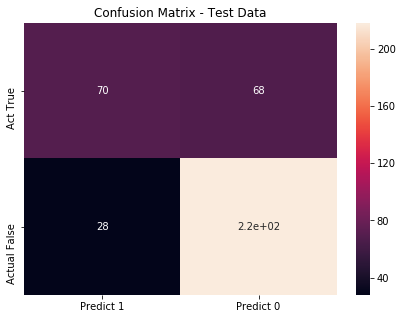

In [47]:
# Confusion Mati=rix
from sklearn import metrics
con_metrix=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
con_metrix
df_cm = pd.DataFrame(con_metrix, index = [i for i in ["Act True","Actual False"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix - Test Data')
sns.heatmap(df_cm,annot=True)

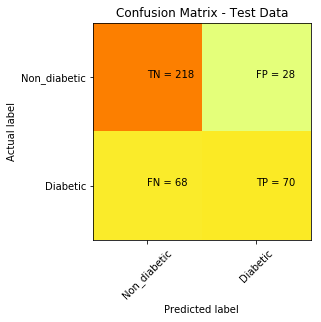

In [48]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [49]:
# Accuracy
TN=218
FP=28
FN=68
TP=70
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_predict))

0.75
0.75


In [50]:
# Printing classification error rate

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_predict))

0.25
0.25


In [51]:
# Recall calculation
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_predict))

0.5072463768115942
0.5072463768115942


In [52]:
#Specificity
print(TN / float(TN + FP))

0.8861788617886179


In [33]:
#False Positive Rate
print(FP / float(TN + FP))

0.0958904109589041


In [53]:
#Precision:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_predict))

0.7142857142857143
0.7142857142857143


In [54]:
# print the first 10 predicted class with default threshold of 0.3
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(x_test)[0:10, :]

array([[0.58594944, 0.41405056],
       [0.67975175, 0.32024825],
       [0.73455234, 0.26544766],
       [0.91940492, 0.08059508],
       [0.79126933, 0.20873067],
       [0.54146423, 0.45853577],
       [0.62084017, 0.37915983],
       [0.81356766, 0.18643234],
       [0.81799891, 0.18200109],
       [0.61204988, 0.38795012]])

In [57]:
# print the first 10 predicted probabilities for class 1  (diabetics)
logreg.predict_proba(x_test)[0:10, 1]

array([0.41405056, 0.32024825, 0.26544766, 0.08059508, 0.20873067,
       0.45853577, 0.37915983, 0.18643234, 0.18200109, 0.38795012])

In [60]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Reduce the threshold from .5 to .3 to predict the diabetics class. This will make the model sensitive to diabetic class

In [61]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]  # deciding the class of the 1st 10 records based on new threshold

In [62]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.41405056, 0.32024825, 0.26544766, 0.08059508, 0.20873067,
       0.45853577, 0.37915983, 0.18643234, 0.18200109, 0.38795012])

In [63]:
# print the first 10 predicted classes with the lower threshold. Note the change in class...
# with threshold of .5 (default) , the first data point would belong to 0 class i.e. non-diabetic 
y_pred_class[0:10]

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.])

In [64]:
# confusion matrix threshold of 0.30
print(metrics.confusion_matrix(y_test, y_pred_class))

[[160  86]
 [ 24 114]]


In [65]:
# previous confusion matrix (default threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_predict))

[[218  28]
 [ 68  70]]


# ROC Curve

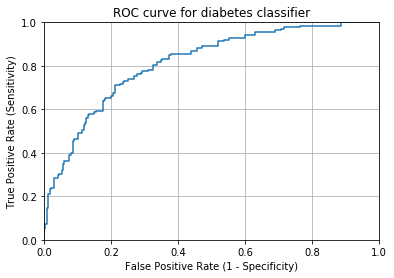

In [67]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [68]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [69]:
evaluate_threshold(0.5)

Sensitivity: 0.5072463768115942
Specificity: 0.8861788617886179


In [70]:
evaluate_threshold(0.3)

Sensitivity: 0.8260869565217391
Specificity: 0.6504065040650406



# AUC is the percentage of the ROC plot that is underneath the curve:

In [71]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8144809708966655


In [72]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8246837606837607